In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (15, 6)
rcParams['image.cmap'] = 'viridis'
from scipy.stats import multivariate_normal
from scipy.stats import norm

# [2] –ò—Ä–∏—Å—ã –§–∏—à–µ—Ä–∞

In [2]:
from sklearn.datasets import load_iris

tmp = load_iris()
data, target = tmp['data'], tmp['target']
del tmp
print('data.shape: ', data.shape)
print('target:', set(target))

data.shape:  (150, 4)
target: {0, 1, 2}


### {1} –û—Ü–µ–Ω–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å–º–µ—Å–∏

In [3]:
def estimateParams(X):
    '''
     X -- –º–∞—Ç—Ä–∏—Ü–∞ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –≤–∏–¥–∞ –ò—Ä–∏—Å–æ–≤;
     
    '''
    cov = np.cov(X.T)
    return np.mean(X, axis=0), cov

In [4]:
irises = {}
for i in range(3):
    tmp = estimateParams(data[target == i])
    print("SIZE of {}: {}".format(i, data[target == i].shape))
    irises[i] = {'data':data[target == i],'E':tmp[0], 'cov':tmp[1]}
    print('E:', tmp[0])
    print('Cov:\n', tmp[1])
    print('----')

SIZE of 0: (50, 4)
E: [ 5.006  3.418  1.464  0.244]
Cov:
 [[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]
----
SIZE of 1: (50, 4)
E: [ 5.936  2.77   4.26   1.326]
Cov:
 [[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]
----
SIZE of 2: (50, 4)
E: [ 6.588  2.974  5.552  2.026]
Cov:
 [[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]
----


### {2} 

–ó–∞–Ω—É–º–µ—Ä—É–µ–º –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –¥–∞–Ω–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ —á–∏—Å–ª–∞–º–∏ 0, 1, 2, 3. 
* –î–ª—è –ø–∞—Ä –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç (0, 1), (1,3) –∏ (2,3) –≤—ã—á–∏—Å–ª–∏—Ç–µ –ø–ª–æ—Ç–Ω–æ—Å—Ç—å –∫–∞–∂–¥–æ–∏ÃÜ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã —Å–º–µ—Å–∏ (—Ç—Ä–∏ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –∫–∞–∂–¥–æ–∏ÃÜ –ø–∞—Ä—ã –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç), –æ—Ü–µ–Ω–∏–≤ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ÃÜ –ø–æ –ø—Ä–æ–µ–∫—Ü–∏—è–º —Ç—Ä–µ—Ö –≤—ã–±–æ—Ä–æ–∫ (–∫–∞–∂–¥–∞—è –≤—ã–±–æ—Ä–∫–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –æ–¥–Ω–æ–∏ÃÜ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–µ —Å–º–µ—Å–∏) –Ω–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ø–ª–æ—Å–∫–æ—Å—Ç–∏.
* –ù–∞—Ä–∏—Å—É–∏ÃÜ—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏ (—Ä–∏—Å–æ–≤–∞—Ç—å –Ω—É–∂–Ω–æ –ª–∏–Ω–∏–∏ —É—Ä–æ–≤–Ω—è) —ç—Ç–∏—Ö –ø–ª–æ—Ç–Ω–æ—Å—Ç–µ–∏ÃÜ (3 √ó 3 = 9 —à—Ç—É–∫), –Ω–∞ –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞–Ω–µ—Å–∏—Ç–µ —Ç–∞–∫–∂–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ø—Ä–æ–µ–∫—Ü–∏–∏ —Ç–æ—á–µ–∫ –≤—ã–±–æ—Ä–∫–∏.

In [5]:
def get_pair_dict(irises, pairs):
    pair_dict = {}
    for p in pairs:
        pair_dict[p] = {}
        for i in range(3):
            pair_dict[p][i] = {}
            mean = (irises[i]['E'][p[0]], irises[i]['E'][p[1]])
            # –ø—Ä–æ—â–µ —Å–Ω–æ–≤–∞ –ø–æ—Å—á–∏—Ç–∞—Ç—å –º–∞—Ç—Ä–∏—Ü—É –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–π –¥–ª—è –≤–µ–∫—Ç–æ—Ä–æ–≤ p[0] –∏ p[1]
            cov = np.cov(irises[i]['data'][:,p[0]], irises[i]['data'][:,p[1]])
            # –∑–¥–µ—Å—å –≤—ã–±–∏—Ä–∞–µ–º –∏–∑ –¥–∞–Ω–Ω—ã—Ö –∏—Ä–∏—Å–∞ i-–æ–≥–æ –Ω—É–∂–Ω—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã p:
            subsample = irises[i]['data'][:, p]
            # —Å—á–∏—Ç–∞–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è –∏–∑ subsample
            pair_dict[p][i]['rvs'] = multivariate_normal(mean=mean, cov = cov)
            pair_dict[p][i]['subsample'] = subsample
    return pair_dict

def draw_irises(irises, pairs):
    f, axes = plt.subplots(3,3)
    f.set_figheight(15)
    f.set_figwidth(15)
    pair_dict = get_pair_dict(irises, pairs)

    for i in range(3):
        for j,p in enumerate(pairs):
            tmp = pair_dict[p][i]['subsample']
            # –¥–∞–ª–µ–µ —Å—Ç—Ä–∞–Ω–Ω—ã–µ –¥–µ–π—Å—Ç–≤–∏—è –ª–∏—à—å –¥–ª—è —Ç–æ–≥–æ, 
                                # —á—Ç–æ–±—ã —ç—Ç–æ –Ω–∞—Ä–∏—Å–æ–≤–∞–ª–æ—Å—å;
            # –ù–æ –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ –≤—Å–µ —Å—Ç–∞—Ä–∞–Ω–∏—è –ª–∏–Ω–∏–∏ –≤—Å–µ —Ä–∞–≤–Ω–æ –º–æ—Ö–Ω–∞—Ç—ã–µ.
            # –Ø –Ω–µ –∑–Ω–∞—é, –ø–æ—á–µ–º—É –æ–Ω–∏ –º–æ—Ö–Ω–∞—Ç—ã–µ.
#             x1, y1 = np.meshgrid(tmp[:,0], tmp[:,1])
            x1,y1 = np.mgrid[min(tmp[:,0]):max(tmp[:,0]):0.01, min(tmp[:,1]):max(tmp[:,1]):0.01]
            pos = np.empty(x1.shape + (2,))
            pos[:, :, 0] = x1
            pos[:, :, 1] = y1
            density = pair_dict[p][i]['rvs'].pdf(pos)
            axes[i,j].contourf(x1, y1, density)
            axes[i,j].scatter(tmp[:,0], tmp[:,1], c='r')
            axes[i,j].set_title("Iris type = {}\n axes: {}".format(i,p))

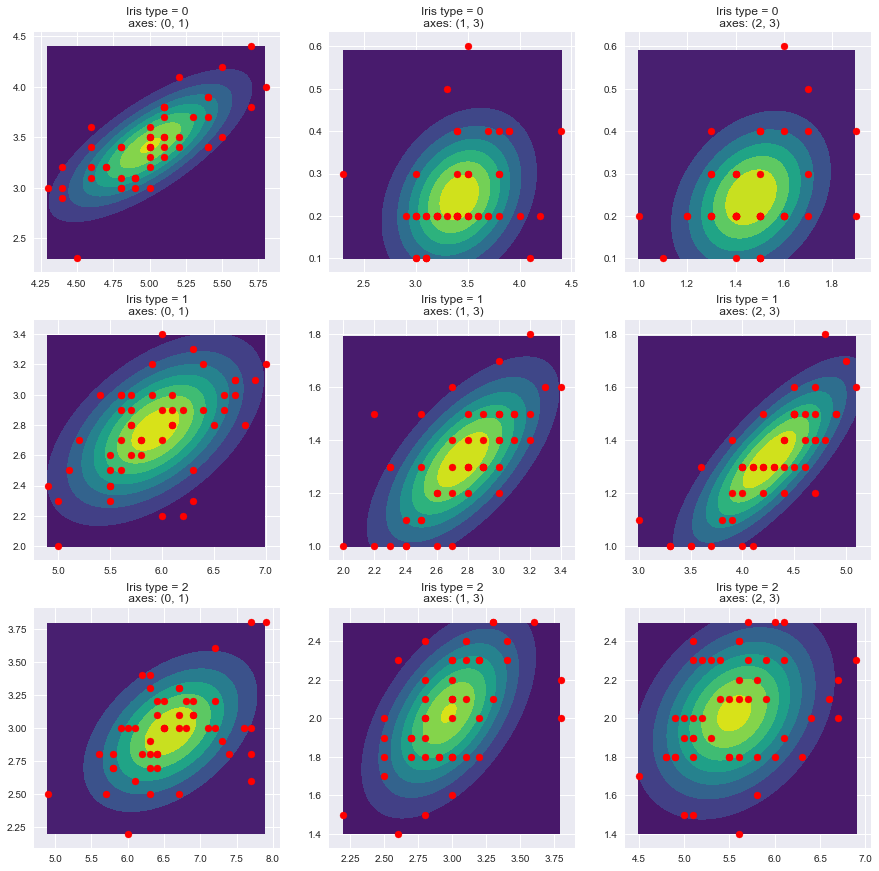

In [6]:
pairs = [(0,1), (1,3), (2,3)]
draw_irises(irises, pairs)

### {3} 
* –û—Ü–µ–Ω–∏—Ç–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ $P(ùëá = ùëò)$ —á–∞—Å—Ç–æ—Ç–∞–º–∏ –≤—Ö–æ–∂–¥–µ–Ω–∏–∏ÃÜ ùëò-—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç —Å–º–µ—Å–∏ –≤ –¥–∞–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫—É.
* –ù–∞ –æ—Å–Ω–æ–≤–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –æ—Ü–µ–Ω–æ–∫ –≤—ã—á–∏—Å–ª–∏—Ç–µ —É—Å–ª–æ–≤–Ω–æ–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ $E(X|T \neq k)$ –¥–ª—è –≤—Å–µ—Ö $k = 1,2,3$ (—Ç—Ä–∏ —á–∏—Å–ª–∞).

–û—Ü–µ–Ω–∏–º P(ùëá=ùëò) —Å –ø–æ–º–æ—â—å—é —á–∞—Å—Ç–æ—Ç –≤—Ö–æ–∂–¥–µ–Ω–∏–π —ç–ª–µ–º–µ–Ω—Ç–æ–≤ —Ä–∞–∑–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤ –≤ –≤—ã–±–æ—Ä–∫—É.
–û—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ —á–∞—Å—Ç–æ—Ç—ã –≤–µ–∑–¥–µ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ, —Ç.–∫. –≤—ã–±–æ—Ä–∫–∞ —É—Ä–∞–≤–Ω–æ–≤–µ—à–µ–Ω–Ω–∞—è 
–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ i —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –ø–æ–¥–∫–ª–∞—Å—Å –±—É–¥–µ—Ç –∏–º–µ—Ç—å 50/50 –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª–µ–π, –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –∫—Ä–æ–º–µ i, –∫–ª–∞—Å—Å–æ–≤;

–ü–æ—ç—Ç–æ–º—É —è –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –Ω–µ –ø–æ–Ω–∏–º–∞—é —ç—Ç–æ –∑–∞–¥–∞–Ω–∏–µ.
–û–¥–Ω–∞–∫–æ –∏—Å–∫–æ–º—ã–µ —á–∏—Å–ª–∞ –±—É–¥—É—Ç —Å–ª–µ–¥—É—é—â–∏–µ:

* [0] 0.5*1+0.5*2 = 1.5
* [1] 0.5*2 = 1
* [2] 0.5*1 = 0.5

### {4}

–î–ª—è –ø–∞—Ä –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç (0,1), (1,3) –∏ (2,3) –ø–æ–ª—É—á–∏—Ç–µ –Ω–æ–≤—ã–µ –æ—Ü–µ–Ω–∫–∏ (—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è T)

–∏ –ø–æ—Å—Ç—Ä–æ–∏ÃÜ—Ç–µ –≥—Ä–∞—Ñ–∏–∫–∏ —É—Å–ª–æ–≤–Ω–æ–∏ÃÜ –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ $p_{(ùëã|I (T \neq k))}(x|1)$ (9 —à—Ç—É–∫).

In [7]:
## –ü–æ—Å—Ç—Ä–æ–∏–º —Ç–∞–∫–æ–π –∂–µ –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è –∏–Ω–≤–µ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏—Ä–∏—Å–æ–≤:
inv_irises = {}
for i in range(3):
    tmp = estimateParams(data[target != i])
    print("SIZE of {}: {}".format(i, data[target != i].shape))
    inv_irises[i] = {'data':data[target != i],'E':tmp[0], 'cov':tmp[1]}
    print('E:', tmp[0])
    print('Cov:\n', tmp[1])
    print('----')

SIZE of 0: (100, 4)
E: [ 6.262  2.872  4.906  1.676]
Cov:
 [[ 0.43934949  0.12215758  0.45336162  0.1671596 ]
 [ 0.12215758  0.11072323  0.14279596  0.08002828]
 [ 0.45336162  0.14279596  0.6815798   0.28873131]
 [ 0.1671596   0.08002828  0.28873131  0.18042828]]
----
SIZE of 1: (100, 4)
E: [ 5.797  3.196  3.508  1.135]
Cov:
 [[ 0.89362727 -0.08132525  1.79123636  0.74141919]
 [-0.08132525  0.17311515 -0.4172404  -0.17056566]
 [ 1.79123636 -0.4172404   4.38579394  1.86658586]
 [ 0.74141919 -0.17056566  1.86658586  0.84492424]]
----
SIZE of 2: (100, 4)
E: [ 5.471  3.094  2.862  0.785]
Cov:
 [[ 0.41177677 -0.06037778  0.75514949  0.28693434]
 [-0.06037778  0.2266303  -0.41083636 -0.151     ]
 [ 0.75514949 -0.41083636  2.09833939  0.8029596 ]
 [ 0.28693434 -0.151       0.8029596   0.32068182]]
----


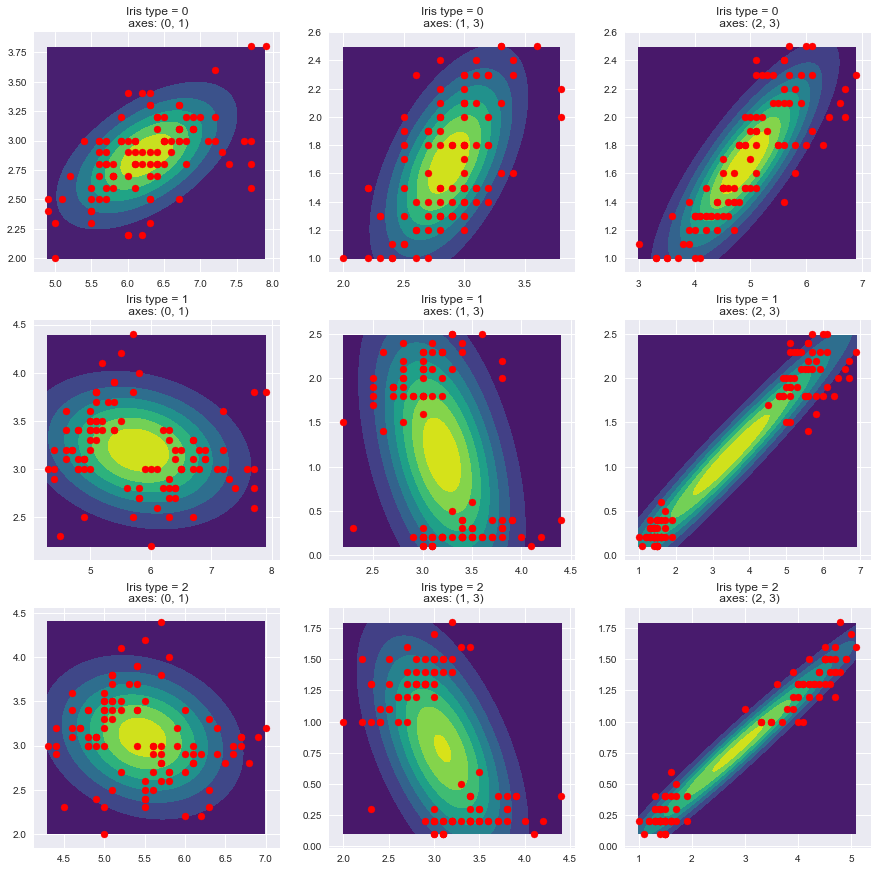

In [8]:
pairs = [(0,1), (1,3), (2,3)]
draw_irises(inv_irises, pairs)

### {5}

* –ö–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–∏ÃÜ—Ç–µ –≤—Å–µ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ 4-–º–µ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤ –ø–æ –ø—Ä–∏–Ω—Ü–∏–ø—É:


$$ùëò = {argmax}_{k} p_{(X|I (T \neq k))}(x|1)$$

(–∑–¥–µ—Å—å —É—Å–ª–æ–≤–Ω–∞—è –ø–ª–æ—Ç–Ω–æ—Å—Ç—å –∏ –æ—Ü–µ–Ω–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è ùëá —Å—á–∏—Ç–∞–µ—Ç—Å—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ—Ü–µ–Ω–æ–∫ –¥–ª—è 4-–º–µ—Ä–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤).

* –ü–æ—Å—á–∏—Ç–∞–∏ÃÜ—Ç–µ –¥–æ–ª—é –æ—à–∏–±–æ–∫ –Ω–∞ –≤—ã–±–æ—Ä–∫–µ. 
* –ù–∞—Ä–∏—Å—É–∏ÃÜ—Ç–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—é –≤—Å–µ–≥–æ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–∞ –≤ –ø—Ä–æ–µ–∫—Ü–∏–∏ –Ω–∞ –ø–∞—Ä—ã –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç (0, 1), (1, 3) –∏ (2, 3), –≥–¥–µ –∑–∞–∫—Ä–∞—Å—å—Ç–µ —Ä–∞–∑–Ω—ã–º–∏ —Ü–≤–µ—Ç–∞–º–∏ –æ–±–ª–∞—Å—Ç–∏, –∫–æ—Ç–æ—Ä—ã–µ –æ–±—Ä–∞–∑–æ–≤–∞–ª–∏—Å—å –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏.

–ö–∞–∫ —è —ç—Ç–æ –ø–æ–Ω–∏–º–∞—é –ø—Ä–æ—Å—Ç—ã–º —è–∑—ã–∫–æ–º:
–¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—ç–º–ø–ª–∞ –¥–ª—è –æ—Ü–µ–Ω–æ–∫ –∏–∑ inv_irises –º—ã –ø—Ä–æ–≤–µ—Ä—è–µ–º –¥–ª—è –∫–∞–∫–æ–≥–æ –∫–ª–∞—Å—Å–∞ pdf –≤—ã—Ö–æ–¥–∏—Ç –±–æ–ª—å—à–µ;
—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –ª–µ–π–±–ª –∏ –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ–º —Å—ç–º–ø–ª—É.
–ê —Ç–µ–ø–µ—Ä—å —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è.

In [9]:
class ArgmaxClassifier():
    def __init__(self):
        self.irises = None
        self.rvs = []
    def fit(self, irises):
        self.irises = irises
        for i in range(3):
            mean = self.irises[i]['E']
            cov = self.irises[i]['cov']
            self.rvs.append(multivariate_normal(mean=mean, cov = cov))
    def predict_sample(self, sample):
        res = np.argmax([self.rvs[i].pdf(sample) for i in range(3)])
        return res
    def predict(self, X):
        return np.array(list(map(self.predict_sample, X)))

In [10]:
clf = ArgmaxClassifier()
clf.fit(inv_irises)
result_max = clf.predict(data)
error = np.sum(result_max != target)/len(target)
print('Errors: {}% '.format(np.round(error*100,2)))

Errors: 96.67% 


–û, –¥–∞. –ú—ã –ø–æ–ª—É—á–∏–ª–∏, —á—Ç–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–∞–æ–±–æ—Ä–æ—Ç. –≠—Ç–æ –∏ –Ω–µ—É–¥–∏–≤–∏—Ç–µ–ª—å–Ω–æ, —Ç.–∫. —Å–µ–π—á–∞—Å –æ–Ω –≤—ã–±–∏—Ä–∞–µ—Ç –∏—Å–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ —Ç–æ—Ç –ª–µ–π–±–ª, –Ω–∞ –∫–æ—Ç–æ—Ä—ã–π –¥–∞–Ω–Ω—ã–π —Å—ç–º–ø–ª –ø–æ—Ö–æ–∂ –º–µ–Ω—å—à–µ –≤—Å–µ–≥–æ.
–ü–æ–ø—Ä–æ–±—É–µ–º —Å–¥–µ–ª–∞—Ç—å –≤–º–µ—Å—Ç–æ argmax argmin.

In [11]:
class ArgminClassifier(ArgmaxClassifier):
    def predict_sample(self, sample):
        res = np.argmin([self.rvs[i].pdf(sample) for i in range(3)])
        return res

In [12]:
clf = ArgminClassifier()
clf.fit(inv_irises)
result_min = clf.predict(data)
error = np.sum(result_min != target)/len(target)
print('Errors: {}% '.format(np.round(error*100,2)))

Errors: 11.33% 


–ò –≤–æ—Ç –º—ã –ø–æ–ª—É—á–∏–ª–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –Ω–µ–ø–ª–æ—Ö–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä.

–¢–µ–ø–µ—Ä—å –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.

In [13]:
def draw_predictions(data, pairs, predictions):
    
    color_set = ['m', 'y', 'c']
    colors = [color_set[i] for i in predictions]
    
    for j,p in enumerate(pairs):
        tmp = data[:, p]
        plt.figure(figsize=(10,10))
        plt.scatter(tmp[:,0], tmp[:,1], c=colors)
        plt.title("Axes: {}".format(p))
        plt.show()

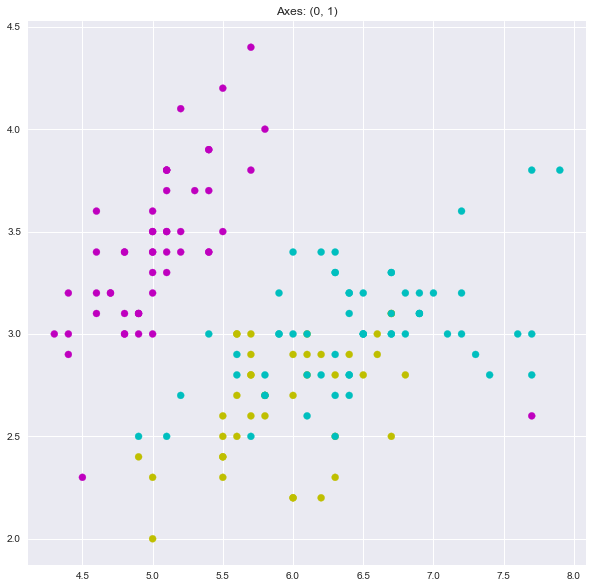

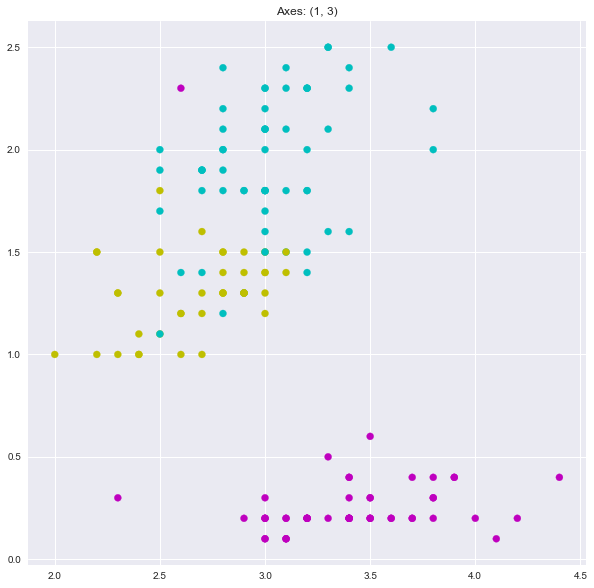

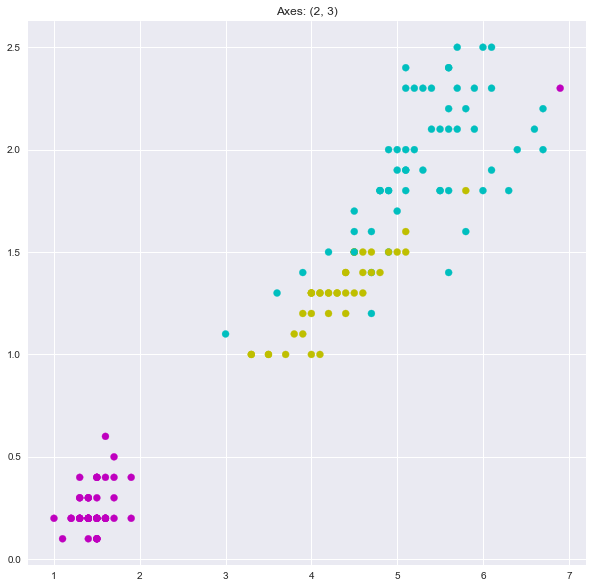

In [14]:
## –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–ª—è ArgMin –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞:
draw_predictions(data, pairs, result_min)

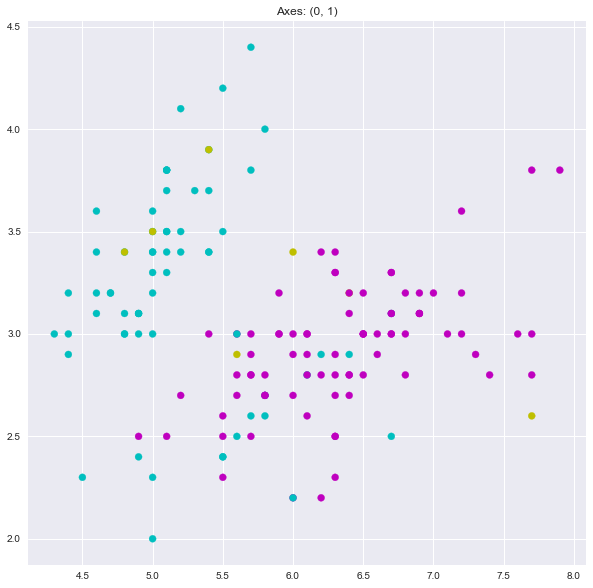

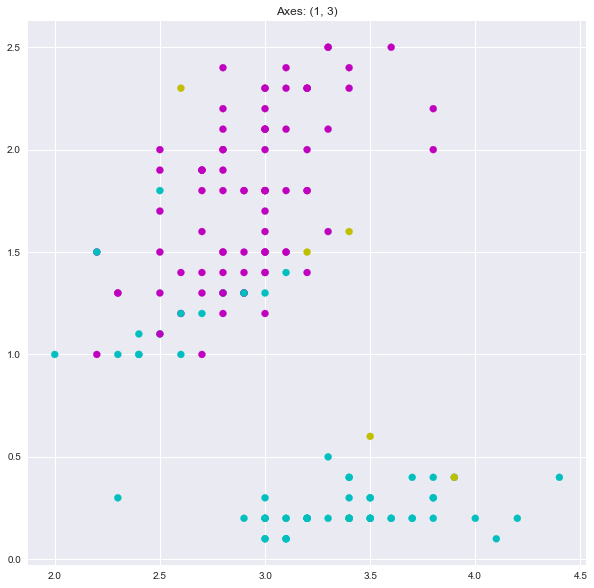

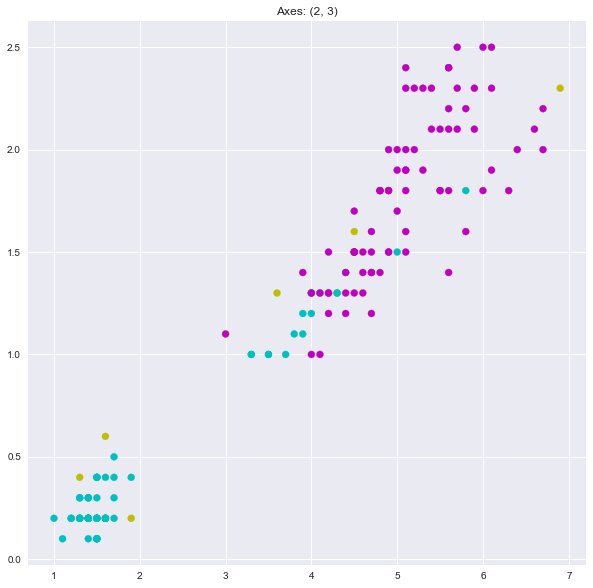

In [15]:
## –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–ª—è ArgMax –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞:
draw_predictions(data, pairs, result_max)